In [407]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
sb.set()

In [408]:
# Helper Functions
# Removing Outliers
def removeOutliers(df):
    temp = pd.DataFrame()
    for var in df:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        temp[var] = df[var][((df[var] > (Q1 - 1.5 * IQR)) & (df[var] < (Q3 + 1.5 * IQR)))]
    temp = temp.dropna()
    return temp

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [409]:
usa_covid = pd.read_csv('county_megaset.csv')
usa_covid['Case Incidence Rate'] = pd.DataFrame(usa_covid['Confirmed']/usa_covid['Total Population'])
usa_covid.head()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Name,State,Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,...,County_Name_y,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,Case Incidence Rate
0,161526,1001,1.539602e+09,25706961,Autauga County,Alabama,2.59,0.05,2.59,0.07,...,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",7/27/2020,932,20,0.016884
1,161527,1003,4.117547e+09,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,0.06,...,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",7/27/2020,2727,17,0.013104
2,161528,1005,2.292145e+09,50538698,Barbour County,Alabama,2.49,0.07,2.44,0.11,...,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",7/27/2020,529,4,0.020518
3,161529,1007,1.612167e+09,9602089,Bibb County,Alabama,2.99,0.14,3.05,0.18,...,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",7/27/2020,327,2,0.014516
4,161530,1009,1.670104e+09,15015423,Blount County,Alabama,2.77,0.05,2.85,0.07,...,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",7/27/2020,601,1,0.010426


In [410]:
usa_covid.describe()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit - Margin of Error,...,Total NonFamily Hhlds w/Female Householder *margin of error,Shape__Area,Shape__Length,UID,code3,Lat,Long_,Confirmed,Deaths,Case Incidence Rate
count,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3219.000000,3219.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3220.000000
mean,9.628897e+05,31393.605280,2.844093e+09,2.143251e+08,2.529093,0.081494,2.563088,0.102336,2.444950,0.202314,...,345.832609,2.581581,0.342835,8.352270e+07,834.913043,37.965788,-91.661759,1316.137578,45.27764,0.008781
std,5.174236e+05,16292.078954,9.255389e+09,1.220804e+09,0.279374,0.067781,0.274885,0.079810,0.393263,0.182878,...,372.099228,3.558888,1.790048,3.222722e+06,32.290983,6.095200,13.388721,6962.304363,456.31641,0.009831
min,2.390100e+04,1001.000000,5.300265e+06,0.000000e+00,1.340000,0.010000,1.790000,0.010000,1.360000,0.010000,...,12.000000,0.126110,0.000550,6.307200e+07,630.000000,17.982429,-174.159600,0.000000,0.00000,0.000000
25%,4.849888e+05,19032.500000,1.085268e+09,7.009854e+06,2.350000,0.040000,2.400000,0.050000,2.200000,0.100000,...,135.000000,1.622240,0.114586,8.401806e+07,840.000000,34.353621,-98.086287,43.000000,0.00000,0.002741
50%,9.741585e+05,30024.000000,1.565689e+09,1.938601e+07,2.490000,0.070000,2.520000,0.090000,2.400000,0.170000,...,235.000000,1.975052,0.164877,8.402910e+07,840.000000,38.212711,-89.945118,158.000000,2.00000,0.005659
75%,1.419973e+06,46105.500000,2.368884e+09,6.069241e+07,2.650000,0.100000,2.690000,0.130000,2.640000,0.250000,...,405.250000,2.594089,0.246600,8.404504e+07,840.000000,41.694461,-82.990516,585.000000,13.00000,0.011657
max,2.516404e+06,72153.000000,3.770000e+11,2.599228e+10,4.970000,1.140000,4.880000,1.460000,6.810000,5.490000,...,4295.000000,71.549539,74.257061,8.405604e+07,840.000000,69.314792,-65.288130,224051.000000,23500.00000,0.163063


In [411]:
usa_multi = usa_covid[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)', 'Percent of Population with No Health Insurance Coverage', 'Households: Income Below Poverty Level (%)', 'Confirmed', 'Deaths', 'Case Incidence Rate']]

In [412]:
usa_multi.head()

,Average Household Size,Total Population,Population Density (people per square kilometer),Percent of Population with No Health Insurance Coverage,Households: Income Below Poverty Level (%),Confirmed,Deaths,Case Incidence Rate
0,2.59,55200,35.853419,7.1,14.7,932,20,0.016884
1,2.61,208107,50.541504,8.9,10.5,2727,17,0.013104
2,2.49,25782,11.247981,11.3,27.5,529,4,0.020518
3,2.99,22527,13.973114,10.7,18.4,327,2,0.014516
4,2.77,57645,34.515816,10.8,14.2,601,1,0.010426


In [413]:
usa_multi.describe()

,Average Household Size,Total Population,Population Density (people per square kilometer),Percent of Population with No Health Insurance Coverage,Households: Income Below Poverty Level (%),Confirmed,Deaths,Case Incidence Rate
count,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3220.000000
mean,2.529093,1.013323e+05,112.623419,9.549627,15.606304,1316.137578,45.27764,0.008781
std,0.279374,3.260964e+05,693.241940,5.086483,7.909034,6962.304363,456.31641,0.009831
min,1.340000,7.500000e+01,0.014362,0.000000,2.300000,0.000000,0.00000,0.000000
25%,2.350000,1.121425e+04,6.636347,5.700000,10.700000,43.000000,0.00000,0.002741
50%,2.490000,2.595050e+04,17.822770,8.600000,13.900000,158.000000,2.00000,0.005659
75%,2.650000,6.655225e+04,51.347991,12.000000,18.400000,585.000000,13.00000,0.011657
max,4.970000,1.009805e+07,27819.804800,46.300000,62.300000,224051.000000,23500.00000,0.163063


## Multivariate EDA

In [414]:
y = pd.DataFrame(usa_multi['Confirmed'])
#y = pd.DataFrame(usa_multi['Case Incidence Rate'])
X = pd.DataFrame(usa_multi[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)', 'Percent of Population with No Health Insurance Coverage', 'Households: Income Below Poverty Level (%)']])

In [415]:
y.describe()

,Confirmed
count,3220.000000
mean,1316.137578
std,6962.304363
min,0.000000
25%,43.000000
50%,158.000000
75%,585.000000
max,224051.000000


In [416]:
X.describe()

,Average Household Size,Total Population,Population Density (people per square kilometer),Percent of Population with No Health Insurance Coverage,Households: Income Below Poverty Level (%)
count,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000
mean,2.529093,1.013323e+05,112.623419,9.549627,15.606304
std,0.279374,3.260964e+05,693.241940,5.086483,7.909034
min,1.340000,7.500000e+01,0.014362,0.000000,2.300000
25%,2.350000,1.121425e+04,6.636347,5.700000,10.700000
50%,2.490000,2.595050e+04,17.822770,8.600000,13.900000
75%,2.650000,6.655225e+04,51.347991,12.000000,18.400000
max,4.970000,1.009805e+07,27819.804800,46.300000,62.300000


<AxesSubplot:>

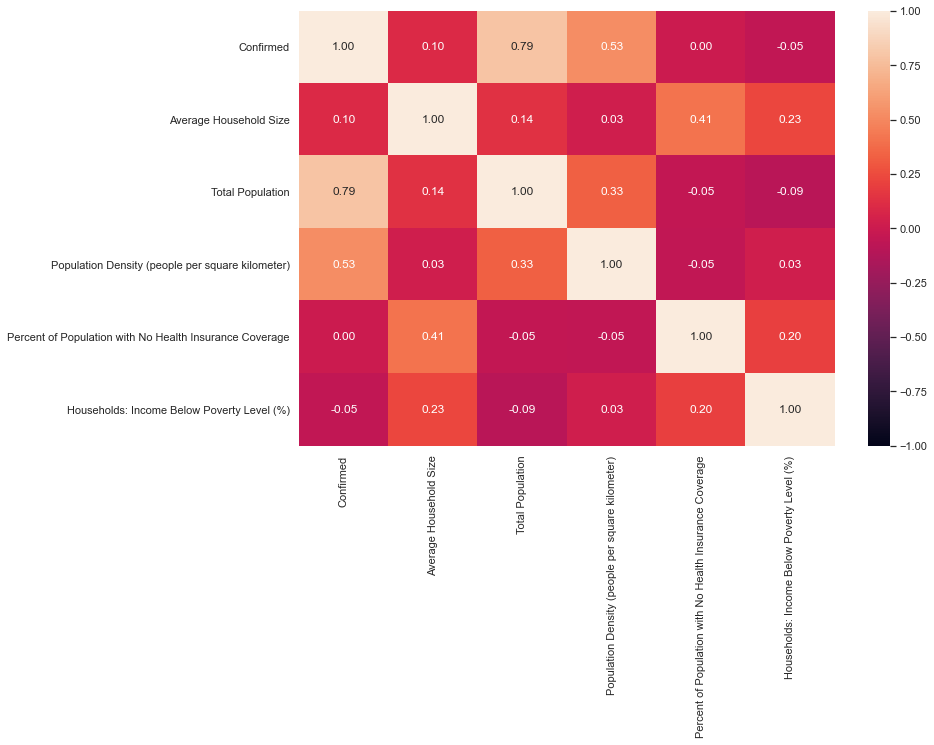

In [417]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y, X], axis = 1).reindex(y.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

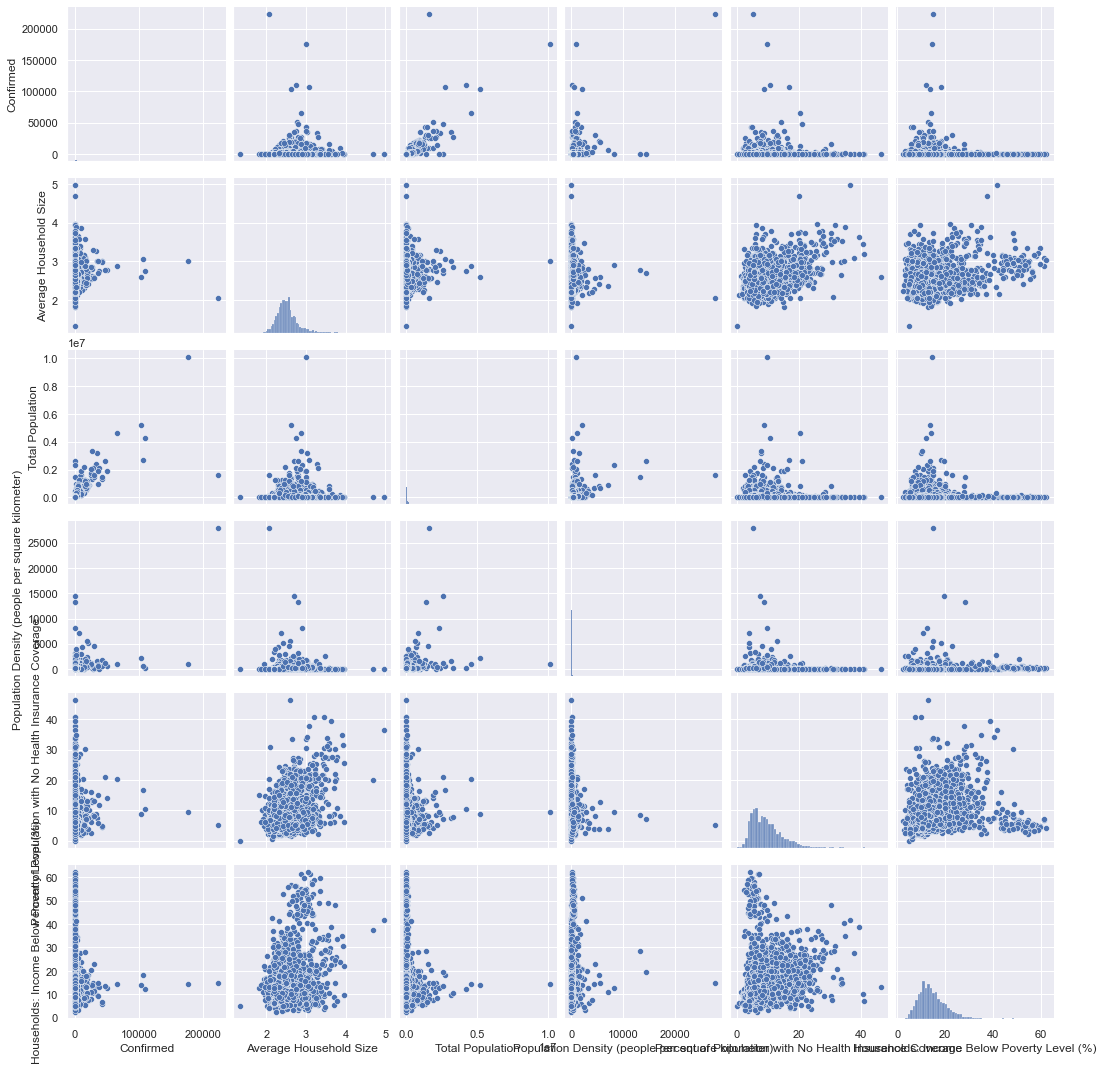

In [418]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [419]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2576, 1) (2576, 5)
Test Set  : (644, 1) (644, 5)


In [420]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Linear Regression

In [421]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [619.71310957]
Coefficients of Regression 	: a =  [[-7.63142021e+02  1.44032458e-02  3.20042360e+00  8.83463916e+01
  -2.77515126e+00]]



,Predictors,Coefficients
0,AverageHouseholdSize,-763.142021
1,TotalPopulation,0.014403
2,PopulationDensitypeoplepersquarekilometer,3.200424
3,PercentofPopulationwithNoHealthInsuranceCoverage,88.346392
4,HouseholdsIncomeBelowPovertyLevel,-2.775151


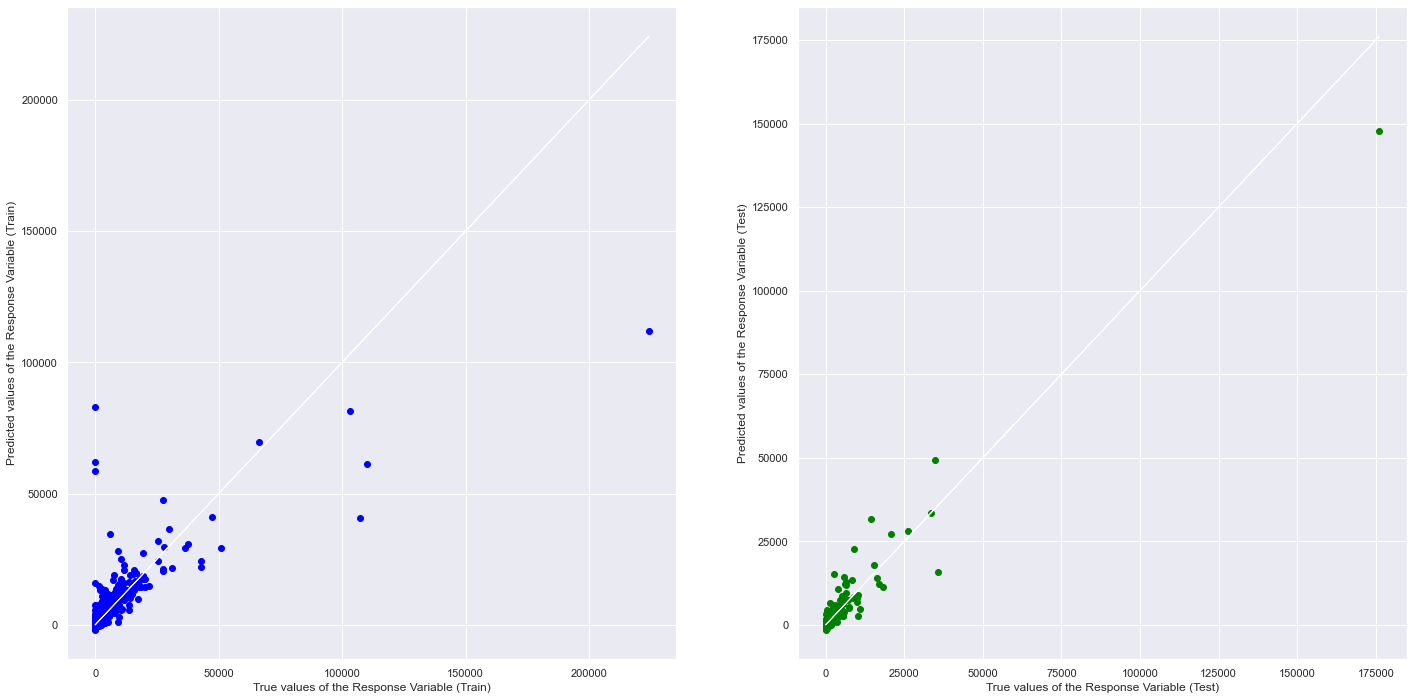

In [422]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [423]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.645392454928681
Mean Squared Error (MSE) 	: 16271647.576338101
Root Mean Squared Error (RMSE) 	: 4033.8130319014663

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9215442972354491
Mean Squared Error (MSE) 	: 4608886.637649404
Root Mean Squared Error (RMSE) 	: 2146.831767430649



### DecisionTree

In [424]:
from sklearn.tree import DecisionTreeRegressor

# Linear Regression using Train Data
# Set max leaf node to 6 else program overfits
dt = DecisionTreeRegressor(max_leaf_nodes=6)
dt.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Import mean_squared_error from sklearn
# from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9015072479651837
Mean Squared Error (MSE) 	: 4519473.350776745
Root Mean Squared Error (RMSE) 	: 2125.9053014602378

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7527543964197747
Mean Squared Error (MSE) 	: 14524463.084324587
Root Mean Squared Error (RMSE) 	: 3811.097359596654



### Boosting Algorithms
### Gradient Boosting Regressor

In [425]:
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression using Train Data
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train.values.ravel())

# Predict the Total values from Predictors
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9900809862953646
Mean Squared Error (MSE) 	: 455147.38067469554
Root Mean Squared Error (RMSE) 	: 674.6461151408904

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7982114684539245
Mean Squared Error (MSE) 	: 11854083.691846287
Root Mean Squared Error (RMSE) 	: 3442.975993504208



In [426]:
import lightgbm

lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = lgb.predict(X_train)
y_test_pred = lgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.615046222558939
Mean Squared Error (MSE) 	: 17664125.557286855
Root Mean Squared Error (RMSE) 	: 4202.871108812029

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.40755384829590346
Mean Squared Error (MSE) 	: 34803297.34997374
Root Mean Squared Error (RMSE) 	: 5899.4319514656445



In [427]:
import xgboost as xg

xg = xg.XGBRFRegressor()
xg.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9600466127560173
Mean Squared Error (MSE) 	: 1833315.2967297924
Root Mean Squared Error (RMSE) 	: 1353.9997402990123

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7455405866133679
Mean Squared Error (MSE) 	: 14948238.92791202
Root Mean Squared Error (RMSE) 	: 3866.2952458279774



In [428]:
import xgboost as xg

xg = xg.XGBRegressor()
xg.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.999626298217385
Mean Squared Error (MSE) 	: 17147.812532125674
Root Mean Squared Error (RMSE) 	: 130.94965647960163

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7919773259531274
Mean Squared Error (MSE) 	: 12220308.899915013
Root Mean Squared Error (RMSE) 	: 3495.7558410042047



In [429]:
usa_multi_clean = pd.DataFrame(removeOutliers(usa_multi))

In [430]:
usa_multi_clean.head()

,Average Household Size,Total Population,Population Density (people per square kilometer),Percent of Population with No Health Insurance Coverage,Households: Income Below Poverty Level (%),Confirmed,Deaths,Case Incidence Rate
0,2.59,55200.0,35.853419,7.1,14.7,932.0,20.0,0.016884
2,2.49,25782.0,11.247981,11.3,27.5,529.0,4.0,0.020518
3,2.99,22527.0,13.973114,10.7,18.4,327.0,2.0,0.014516
4,2.77,57645.0,34.515816,10.8,14.2,601.0,1.0,0.010426
7,2.49,115098.0,73.348688,9.5,18.0,1157.0,6.0,0.010052


In [431]:
usa_multi_clean.describe()

,Average Household Size,Total Population,Population Density (people per square kilometer),Percent of Population with No Health Insurance Coverage,Households: Income Below Poverty Level (%),Confirmed,Deaths,Case Incidence Rate
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.00000,2214.000000,2214.000000,2214.000000
mean,2.452421,28555.532520,19.014618,9.126061,14.50140,182.501355,3.603884,0.006059
std,0.201441,26944.780648,19.666538,4.164171,5.07237,232.466855,5.950071,0.005295
min,1.920000,102.000000,0.058884,0.700000,2.30000,0.000000,0.000000,0.000000
25%,2.320000,9239.500000,4.897665,5.800000,10.80000,28.000000,0.000000,0.002270
50%,2.440000,19676.500000,12.995439,8.500000,13.80000,92.000000,1.000000,0.004251
75%,2.570000,39099.500000,26.108811,11.700000,17.70000,244.750000,4.000000,0.008264
max,3.090000,149452.000000,117.563045,21.100000,29.80000,1386.000000,32.000000,0.024876


In [432]:
y_clean = pd.DataFrame(usa_multi_clean['Confirmed'])
#y_clean = pd.DataFrame(usa_multi_clean['Case Incidence Rate'])
X_clean = pd.DataFrame(usa_multi_clean[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)', 'Percent of Population with No Health Insurance Coverage', 'Households: Income Below Poverty Level (%)']])

<AxesSubplot:>

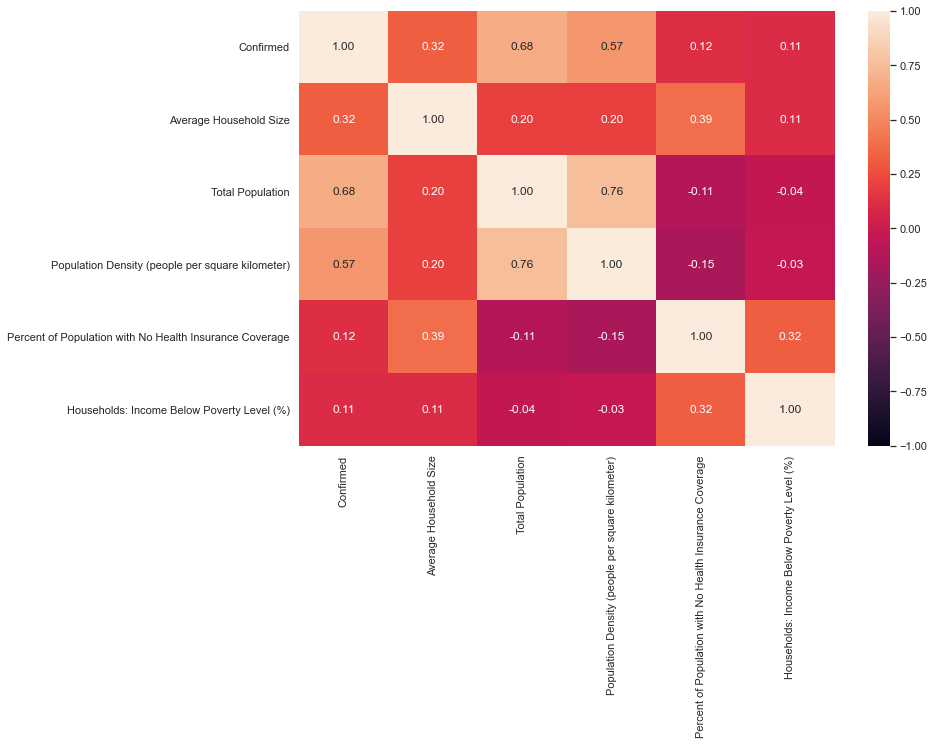

In [433]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_clean, X_clean], axis = 1).reindex(y_clean.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

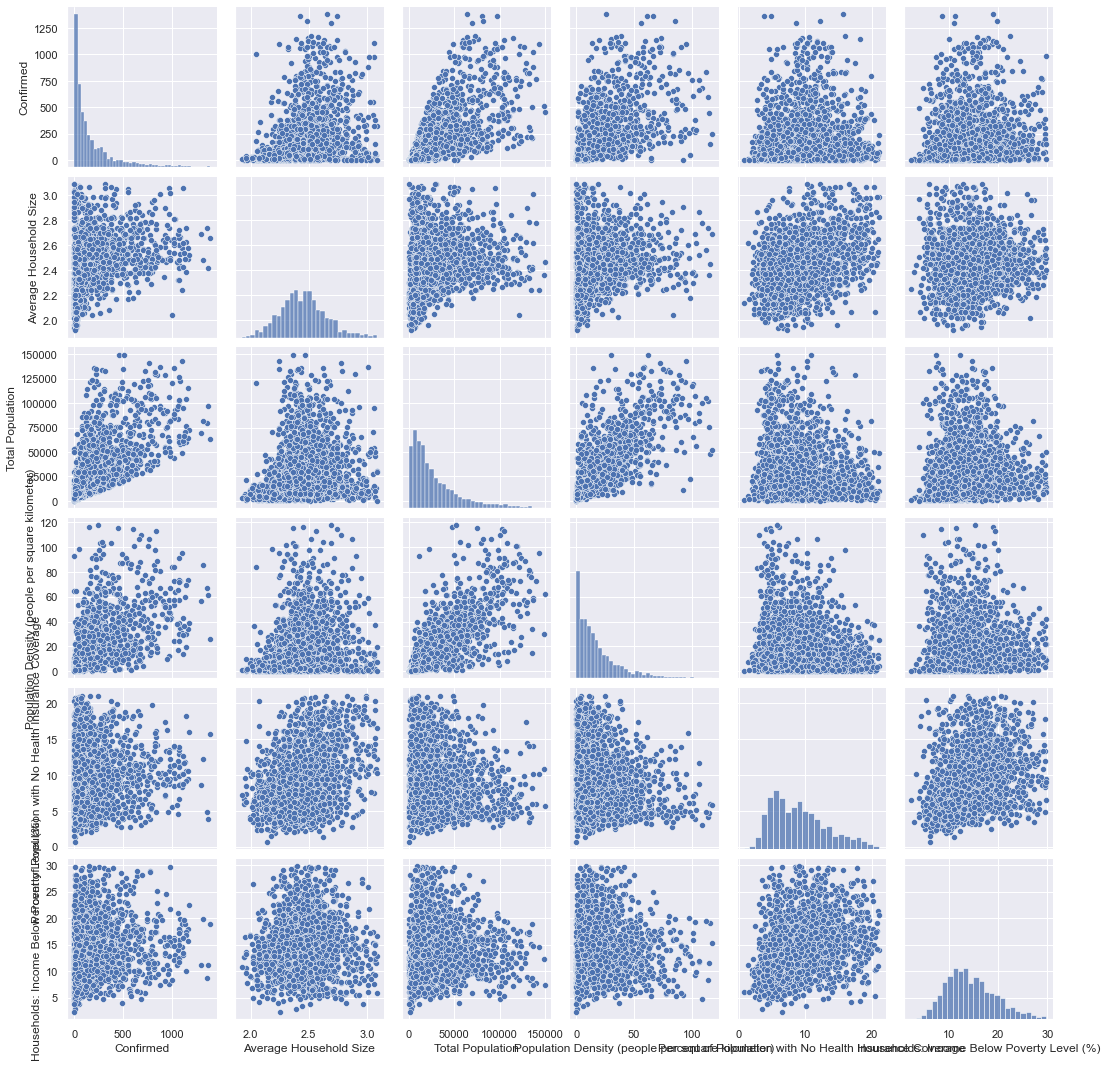

In [434]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [448]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1771, 1) (1771, 5)
Test Set  : (443, 1) (443, 5)


In [473]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [474]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg2 = LinearRegression()         # create the linear regression object
linreg2.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [619.71310957]
Coefficients of Regression 	: a =  [[-7.63142021e+02  1.44032458e-02  3.20042360e+00  8.83463916e+01
  -2.77515126e+00]]



,Predictors,Coefficients
0,AverageHouseholdSize,-763.142021
1,TotalPopulation,0.014403
2,PopulationDensitypeoplepersquarekilometer,3.200424
3,PercentofPopulationwithNoHealthInsuranceCoverage,88.346392
4,HouseholdsIncomeBelowPovertyLevel,-2.775151


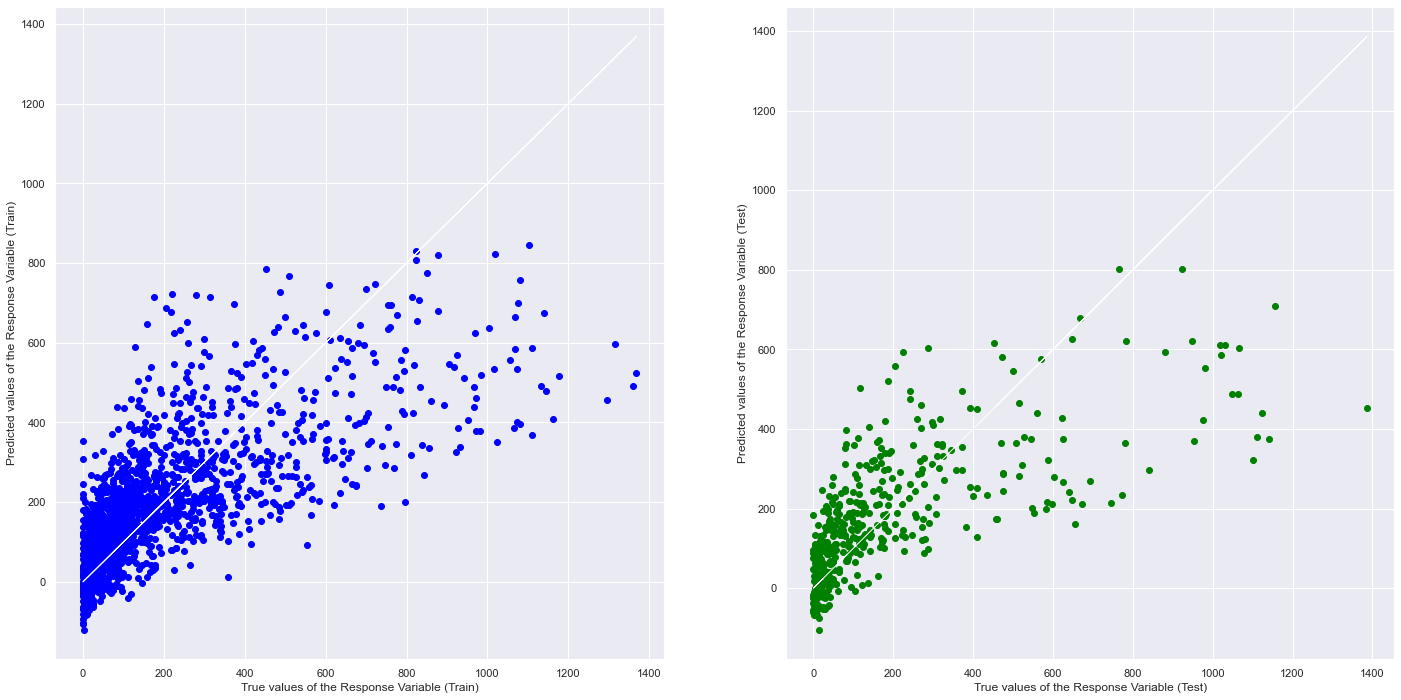

In [475]:
# Predict the Total values from Predictors
y_train_pred = linreg2.predict(X_train)
y_test_pred = linreg2.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [476]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5352208657275208
Mean Squared Error (MSE) 	: 24191.515824637303
Root Mean Squared Error (RMSE) 	: 155.53622029815853

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.505649619373181
Mean Squared Error (MSE) 	: 30581.667938272978
Root Mean Squared Error (RMSE) 	: 174.87615028434547



## Decision Tree Regressor

In [477]:
from sklearn.tree import DecisionTreeRegressor

# Linear Regression using Train Data
dt = DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6149073208494047
Mean Squared Error (MSE) 	: 20043.87666026776
Root Mean Squared Error (RMSE) 	: 141.5763986696503

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5772196566863506
Mean Squared Error (MSE) 	: 26154.178446576974
Root Mean Squared Error (RMSE) 	: 161.7225353702352



## Gradient Boosting

In [478]:
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression using Train Data
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train.values.ravel())

# Predict the Total values from Predictors
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7806411169726681
Mean Squared Error (MSE) 	: 11417.517480290811
Root Mean Squared Error (RMSE) 	: 106.85278414852283

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6205854904221655
Mean Squared Error (MSE) 	: 23471.466792762792
Root Mean Squared Error (RMSE) 	: 153.2040038405093



## Lightgbm

In [479]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = lgb.predict(X_train)
y_test_pred = lgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8962291340232962
Mean Squared Error (MSE) 	: 5401.220410510137
Root Mean Squared Error (RMSE) 	: 73.49299565611771

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6535764886398668
Mean Squared Error (MSE) 	: 21430.56667012786
Root Mean Squared Error (RMSE) 	: 146.39182583097957



## XGBoost

In [480]:
import xgboost as xg
xg = xg.XGBRFRegressor()
xg.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7936464361491
Mean Squared Error (MSE) 	: 10740.597280003452
Root Mean Squared Error (RMSE) 	: 103.63685290476285

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6368480556973382
Mean Squared Error (MSE) 	: 22465.4265618658
Root Mean Squared Error (RMSE) 	: 149.88471090096482



In [481]:
import xgboost as xg

xg = xg.XGBRegressor()
xg.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9908184678359031
Mean Squared Error (MSE) 	: 477.89404528635845
Root Mean Squared Error (RMSE) 	: 21.860787846881422

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5957919152344311
Mean Squared Error (MSE) 	: 25005.255200961223
Root Mean Squared Error (RMSE) 	: 158.13050053977955



In [482]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60],  
              'max_depth': [5, 6, 7],
              'reg_lambda' :[0.26, 0.25, 0.2],
              'eta': [0.1, 0.2, 0.3, 0.4, 0.5]
             }
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1)
grid_result=grid.fit(X_train, y_train)
best_params=grid_result.best_params_
print(best_params)

xg = xg.XGBRFRegressor(eta=best_params["eta"], max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
xg.fit(X_train, y_train)

# Predict the Total values from Predictors
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Fitting 5 folds for each of 135 candidates, totalling 675 fits
{'eta': 0.1, 'max_depth': 6, 'n_estimators': 80, 'reg_lambda': 0.26}
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7792608032762596
Mean Squared Error (MSE) 	: 11489.362101030723
Root Mean Squared Error (RMSE) 	: 107.18844201233043

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.63922512631416
Mean Squared Error (MSE) 	: 22318.375427451185
Root Mean Squared Error (RMSE) 	: 149.3933580432918

